# Identifying Fraud from Enron Email
#### By Kamal Panigrahi


### Project Overview :

In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, there was a significant amount of typically confidential information entered into public record, including tens of thousands of emails and detailed financial data for top executives.


In this project I will build a person of interest(POI) identifier based on financial and email data made public as a result of the Enron scandal. I used email and financial data for 146 executives at Enron to identify persons of interest in the fraud case. A person of interest (POI) is someone who was indicted for fraud, settled with the government, or testified in exchange for immunity. This report documents the machine learning techniques used in building a POI identifier.


### Enron Submission Free-Response Questions :


#### 1.  Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?

The goal of this project is to choose a combination of features of former Enron employees and choose an appropriate machine learning algorithm to predict whether that person is considered as a person of interest (POI) or not. This is  a Supervised Classification problem as we are trying to predict the discrete outcome, which is binary (0 and 1), and we are actually given a data set that where we have the information whether the person is actually a POI or not). The goal will be to get the most accurate predictions when we apply our ML algorithm to test this model.

##### Dataset :

* Total number of persons in the data set: 146
* Total number of persons of interest (poi) in the data set : 18
* Total number of non persons of interest (non poi) in the data set : 128
* Each person has 21 features 

Total number of missing values in features: 1358

* ('salary', 51)
* ('to_messages', 60)
* ('deferral_payments', 107)
* ('total_payments', 21)
* ('long_term_incentive', 80)
* ('loan_advances', 142)
* ('bonus', 64)
* ('restricted_stock', 36)
* ('restricted_stock_deferred', 128)
* ('total_stock_value', 20)
* ('shared_receipt_with_poi', 60)
* ('from_poi_to_this_person', 60)
* ('exercised_stock_options', 44)
* ('from_messages', 60)
* ('other', 53)
* ('from_this_person_to_poi', 60)
* ('deferred_income', 97)
* ('expenses', 51)
* ('email_address', 35)
* ('director_fees', 129)

As we see 'director_fees' , 'restricted_stock_deferred' and 'deferral_payments' have most number of missing values .

##### Outliers

In this step I chose 'salary' and 'bonus' to  visualize the data between  using a scatter plot. Surprisingly one significant outlier was found . When I checked mannually I found it is datapoint with name "Total" .So I removed it . Also while scanning through the dataset I found a datapoint named "THE TRAVEL AGENCY IN THE PARK" . As it was no way related to the employees I removed .



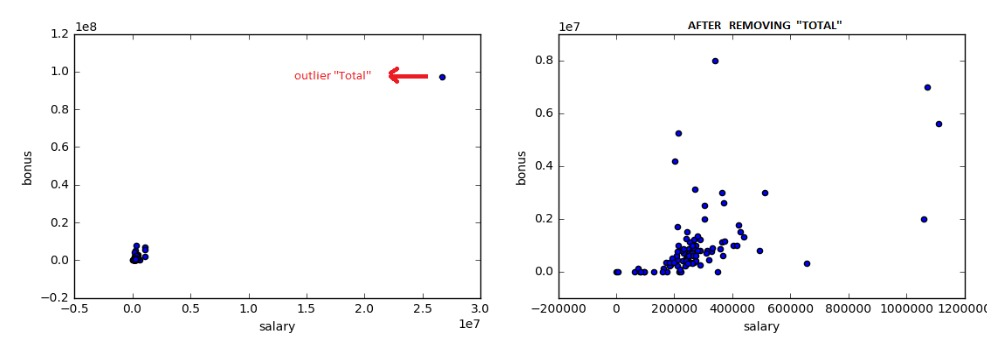

In [1]:
from IPython.display import Image
Image(filename='outliers.jpg')

Though there were some outliers after removal of "Total" I could have removed them but I realised they will help me finding the POI .So I proceeded .


#### 2.   What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that doesn’t come ready-­made in the dataset-­-­explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) If you used an algorithm like a decision tree, please also give the feature importances of the features that you use. 

I applied different algorithms such as GaussianNB, DecisionTreeClassifier, SVC, and RandomForestClassifier with my whole set of features .The scores are shown below :


| Classifier             | Accuracy   | Precision | Recall |
| -----------------------|------------| ----------|--------|
| GaussianNB             | 0.33       | 1.0       | 0.09
| DecisionTreeClassifier | 0.73       | 0.0       | 0.0
| SVC                    | 0.93       | 0.0       | 0.0
| RandomForestClassifier | 0.86       | 0.0       | 0.0

As I saw except GaussianNB others have good accuracy .But the precission and recall of other classifiers is zero .

Then I created two new features ->

1. 'fraction_from_this_person_to_poi'
2. 'fraction_from_poi_to_this_person'

I used the formula -


'fraction_from_this_person_to_poi' =  'from_this_person_to_poi' / 'from_messages'
'fraction_from_poi_to_this_person' =  'from_poi_to_this_person' / 'to_messages'
                                    
The Intuition behind selecting these features was , a person of interest is more likely to send or receive mails to/from other persons of interest .

Again I tried different algorithms and calculated performance for each algorithms applied .The result is given below :


| Classifier             | Accuracy   | Precision | Recall |
| -----------------------|------------| ----------|--------|
| GaussianNB             | 0.58       | 0.8       | 0.125
| DecisionTreeClassifier | 0.82       | 0.0       | 0.5
| SVC                    | 0.93       | 0.0       | 0.0
| RandomForestClassifier | 0.89       | 0.0       | 0.0

After adding two features the accuracy of GaussianNB and DecisionTreeClassifier gone up but the precission and recall din't change for svc .Then I decided to rank my features according to their F1 score using GaussianNB .I tried and ended up with the below result :


* ('total_stock_value', 0.6439909297052154, 0.284, 0.3941707147814018)
* ('exercised_stock_options', 0.5140271493212669, 0.284, 0.36586151368760067)
* ('bonus', 0.5256257449344458, 0.2205, 0.3106727721028531)
* ('deferred_income', 0.5074626865671642, 0.221, 0.30790665273423895)
* ('long_term_incentive', 0.5569823434991974, 0.1735, 0.2645825390773923)
* ('restricted_stock_deferred', 0.15118300703000984, 1.0, 0.26265677326154047)
* ('director_fees', 0.14955507365587378, 1.0, 0.26019644831848043)
* ('fraction_from_this_person_to_poi', 0.27346570397111913, 0.1515, 0.19498069498069498)
* ('salary', 0.5217391304347826, 0.114, 0.1871153057037341)
* ('restricted_stock', 0.5193621867881549, 0.114, 0.18696186961869618)
* ('total_payments', 0.43761996161228406, 0.114, 0.1808806029353431)
* ('loan_advances', 0.5, 0.0515, 0.09338168631006347)
* ('other', 0.25495049504950495, 0.0515, 0.08569051580698835)
* ('from_this_person_to_poi', 0.176, 0.055, 0.0838095238095238)
* ('shared_receipt_with_poi', 0.17457627118644067, 0.0515, 0.07953667953667953)
* ('deferral_payments', 0, 0, 0)
* ('expenses', 0, 0, 0)
* ('to_messages', 0, 0, 0)
* ('from_poi_to_this_person', 0, 0, 0)
* ('from_messages', 0, 0, 0)
* ('fraction_from_poi_to_this_person', 0, 0, 0)

As we see my top performing features are

['total_stock_value','exercised_stock_options','bonus','deferred_income','restricted_stock_deferred','director_fees',
'long_term_incentive','fraction_from_this_person_to_poi','salary','restricted_stock','shared_receipt_with_poi',
'loan_advances','total_payments','other']

Though 'restricted_stock_deferred' and 'director_fees' are performing well but they contain most number of missing values .So I excluded those features to avoid biasing .

Finally I ended up with my features_list:

['poi','total_stock_value','exercised_stock_options','bonus','deferred_income','long_term_incentive',
                             'restricted_stock','salary','total_payments','other', 'shared_receipt_with_poi']

As 'fraction_from_this_person_to_poi' was my newly created feature I din't add in my feature list and kept this to test its affect on final classifier .After I found my final classifier I tested this feature on it but din't find any progress rather it reduced both precision and recall score .So I committed this list as my final feature list with out addition of any new feature.
                    

I tried different classifiers with this set of features .
                         
| Classifier             | Accuracy   | Precision | Recall |
| -----------------------|------------| ----------|--------|
| GaussianNB             | 0.93       | 1.0       | 0.5
| DecisionTreeClassifier | 0.87       | 0.32      | 0.0
| SVC                    | 0.93       | 0.0       | 0.0
| RandomForestClassifier | 0.86       | 0.0       | 0.0

As I saw the accuracy of GaussianNB has gone up and the precssion of both GaussianNB and DecisionTreeClassifier also increased .
#### 3. What algorithm did you end up using? What other one(s) did you try?

I ended up using GaussianNB .I tried others too such as DecisionTreeClassifier ,SVC ,RandomForestClassifier .


#### 4. What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well? How did you tune the parameters of your particular algorithm? (Some algorithms don’t have parameters that you need to tune-­-­if this is the case for the one you picked, identify and briefly explain how you would have done it if you used, say, a decision tree classifier).

As we saw before although the accuracy was high but the precision and recal score was zero in most cases. This means the accuracy, precision, recall or other performance measure is not as good as thay could be if the model is not customized to the particular dataset’s features . Thus to improve the precision and recall score for all the classifiers we need to tune the parameters to optimize the classification models to give us a best possible result.

In my case I first mannually tried different algorithms with different combinations of parameters .But then I found it really useful using GridsearchCV and Pipeline .


##### GaussianNB

I used SelectKBest  in a pipeline to select the k best features , Principal Component Analysis(PCA) to reduce the dimensionality of the features and minmaxscaler fr scaling purpose which were then feed to the GaussianNB classifier .
GridSearchCV was used to try and test different values of k for SelectKBest and n_components for PCA.
* k = [9,10,11]
* n_components = [6,7,8]

The best estimator seemed to select k = 10 and n_components = 7, f_classif was used as the score_func and the result was :

* Training time : 4.1609998703
* Predicting time : 0.0
* Naive Bayes accuracy : 0.863953488372
* f1 score : 0.4
* precision score : 0.5
* recall score : 0.4

##### DecisionTreeClassifier

In this case I used diffrent parameters like 
* 'min_samples_split': [2,3,4],
* 'criterion': ['gini', 'entropy']

After feeding these into GridSearchCV I found the best estimater was with criterion='gini' and  min_samples_split=2.
The result was :

* Training time : 6.637
* Predicting time : 0.001
* Decision Tree accuracy : 0.860465116279
* f1 score : 0.5
* precision score : 0.1
* recall score : 0

##### SVC

In this case I added minmaxscaler to the pipeline and as parameters I tried different kernel, C and gamma .
* 'svc__kernel': ['linear','rbf'],
* 'svc__C': [0.1,1,10,100,1000],
* 'svc__gamma': [1e-3,1e-4,1e-1,1,10]

The best estimater was found with kernel = 'linear', gamma = .001 and C = 100 . The result was found to be :

* Training time : 5.89500021935
* Predicting time : 0.000999927520752
* SVC accuracy score : 0.843953488372
* f1 score : 0.4
* precision score : 0.2
* recall score : 0.33


#### 5. What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?

Validation is a procedure to separate the dataset into training and testing set initially. In this way we can train our model on a training set and then test that model on an independent test dataset. This reduces the problem of over fitting our model to the dataset . If we test the model only on training dataset then we get a overfitted model which will give poor result ona new dataset .

In my case I first splitted my data into traing and testing set usiing train_test_split function of sklearn.cross_validation module with 80% data for training and 20% for testing purpose .

When evaluating different parameters for estimators, there was still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as validation set. Ttraining proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.I validated my analysis by calling test_classifier method which validates using StratifiedKFold cross validation .


#### 6. Give at least 2 evaluation metrics, and your average performance for each of them. Explain an interpretation of your metrics that says something human-­ understandable about your algorithm’s performance.

As eveluation metric I used precision_score and recall_score,

precision = number of true positive / (number of true positive + number of false positive)  i.e the percentage of POI identified correctly out of all identified POI .In my case it is 0.5 which means 50% my model will predict a correct POI.

recall = number of true positive / (number of true positive + number of false negative)  i.e the probability that the model flags a POI when it is actually a POI .In my case it is 0.4 which means 40% of time my model will predict a POI correctly if he is actually a POI .

                           
                                   
                                  ---------------  ooooooooo  ----------------